# Intro
Simple Program to load and check the 4STAR archive files.

For R2 of ORACLES, aod and Gases

# Load the defaults and imports

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [2]:
from linfit import linfit

In [3]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
fp ='C:/Users/sleblan2/Research/ORACLES/'

# load the files

In [5]:
days = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']

In [5]:
days = ['20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']#,'20160927','20160929','20160930']#,'20160825']

In [54]:
days = ['20160902','20160904','20160906','20160908']

In [5]:
days = ['20160831']

In [6]:
vv = 'R1'

In [7]:
vi = 'v7'

In [38]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for i,d in enumerate(days):
    #try:
    #    print 'Doing day: {}'.format(d)
    #    fname_aod = fp+'aod_ict/{vi}/4STAR-AOD_P3_{}_{vv}.ict'.format(d,vv=vv,vi=vi)
    #    tt,th = load_ict(fname_aod,return_header=True)
    #except:
    #    print '*** Problem with day: {} *** Skipping '.format(d)
    #    days.pop(i)
    #    continue
    
    #outaod_RA.append(tt)
    #outaod_head_RA.append(th)
    try:
        print 'Doing day: {}'.format(d)
        fname_gas = fp+'gas_ict/{vi}/4STAR-GAS_P3_{}_{vv}.ict'.format(d,vv=vv,vi=vi)
        print fname_gas
        tt,th = load_ict(fname_gas,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        days.pop(i)
        continue
    
    #outaod_RA.append(tt)
    #outaod_head_RA.append(th)
    #fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    #ttr,thr = load_ict(fname_gas,return_header=True)
    outgas_RA.append(tt)
    outgas_head_RA.append(th)

Doing day: 20160824
C:/Users/sleblan2/Research/ORACLES/gas_ict/v7/4STAR-GAS_P3_20160824_R1.ict
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20160825
C:/Users/sleblan2/Research/ORACLES/gas_ict/v7/4STAR-GAS_P3_20160825_R1.ict
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20160827
C:/Users/sleblan2/Research/ORACLES/gas_ict/v7/4STAR-GAS_P3_20160827_R1.ict
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20160830
C:/Users/sleblan2/Research/ORACLES/gas_ict/v7/4STAR-GAS_P3_20160830_R1.ict
('Sta

In [26]:
len(outgas_RA)

18

In [27]:
len(days)

18

## Check the files for integrity and header info

In [123]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on {vv} aod string line {}: {} and {vv} of num {}:{} '.format(i,s,ig,g[i],vv=vv)
#    for ir,r in enumerate(outgas_head_RA):
#        if not s==r[i]:
#            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 1:2016, 08, 25, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 2:2016, 08, 27, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 3:2016, 08, 30, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 4:2016, 09, 04, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 5:2016, 09, 06, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 6:2016, 09, 08, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 7:2016, 09, 10, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 8:2016, 09, 12, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 9:2016, 09, 14, 2017, 05, 01
 
no match on R1 aod string line 6: 201

In [28]:
print 'day:       AOD {vv}     GAS {vv}'.format(vv=vv)
for i,d in enumerate(days):
    try:
        print '{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC']))
    except:
        print '{}: missed'.format(d)

day:       AOD R1     GAS R1
20160824: missed
20160825: missed
20160827: missed
20160830: missed
20160831: missed
20160902: missed
20160904: missed
20160906: missed
20160908: missed
20160910: missed
20160912: missed
20160914: missed
20160918: missed
20160920: missed
20160924: missed
20160925: missed
20160927: missed
20160930: missed


In [29]:
outgas_head_RA[0]

['52, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2016\n',
 '1, 1\n',
 '2016, 08, 24, 2017, 06, 30\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160824\n',
 '17\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -99999.0000000, -99999.0000000, -99999.0, -99999.00, -99999.00, -99999.000, -99999.000, -99999, -99999.00, -99999.000, -99999, -99999.000, -99999.00000, -99999, -99999.000, -99999.00000, -99999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'amass_O3, unitless, ozone optical airmass\n',
 'amass_NO2, unitless, NO2 optical airmass\n',
 'CWV, g/cm^2, column water vapor calculated as average of values retrieved in 940-960 nm band\n',
 'std_CWV, g/cm^2, standard deviati

## Check the variables in header

In [32]:
nm = outgas_RA[0].dtype.names

In [33]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'amass_O3',
 'amass_NO2',
 'CWV',
 'std_CWV',
 'QA_CWV',
 'VCD_O3',
 'resid_O3',
 'QA_O3',
 'VCD_NO2',
 'resid_NO2',
 'QA_NO2',
 'VCD_HCOH',
 'resid_HCOH',
 'QA_HCOH')

# make plots of the gases

In [34]:
outgas_RA[0].dtype.names

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'amass_O3',
 'amass_NO2',
 'CWV',
 'std_CWV',
 'QA_CWV',
 'VCD_O3',
 'resid_O3',
 'QA_O3',
 'VCD_NO2',
 'resid_NO2',
 'QA_NO2',
 'VCD_HCOH',
 'resid_HCOH',
 'QA_HCOH')

<IPython.core.display.Javascript object>


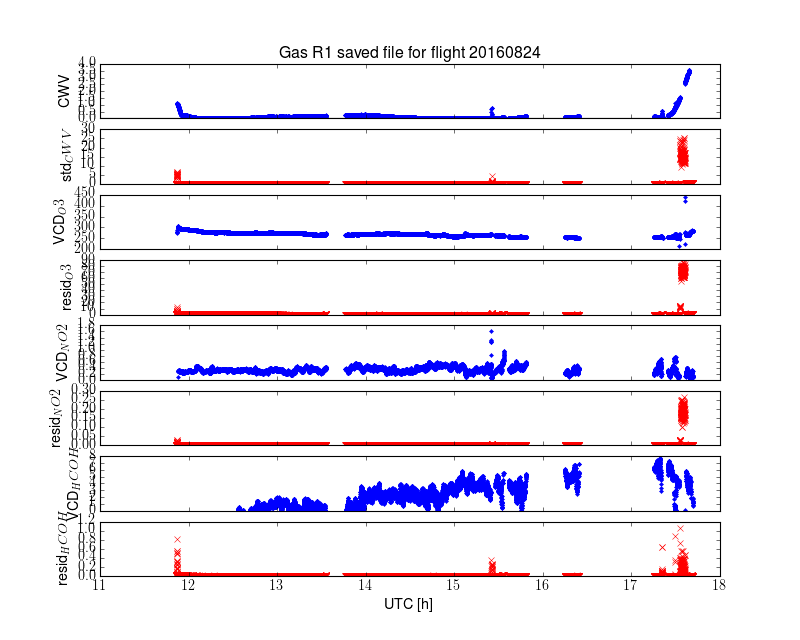

<IPython.core.display.Javascript object>


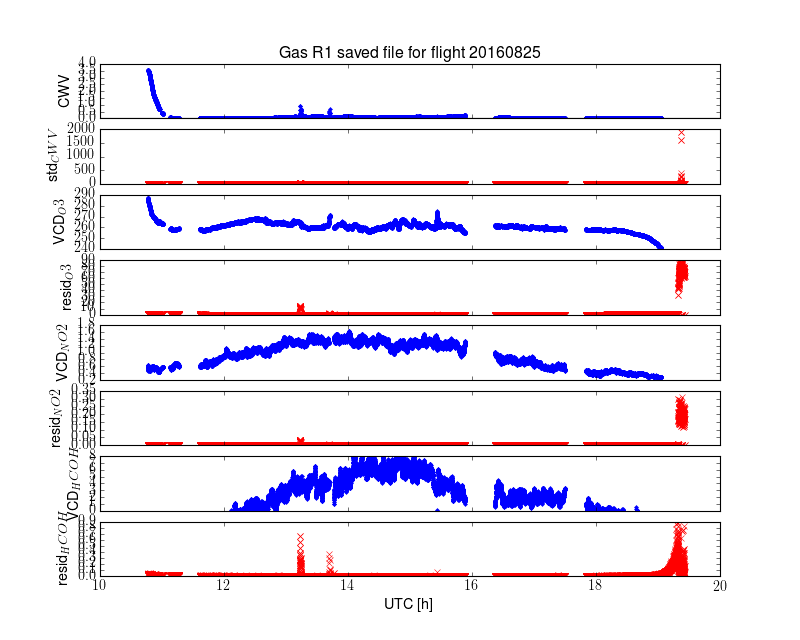

<IPython.core.display.Javascript object>


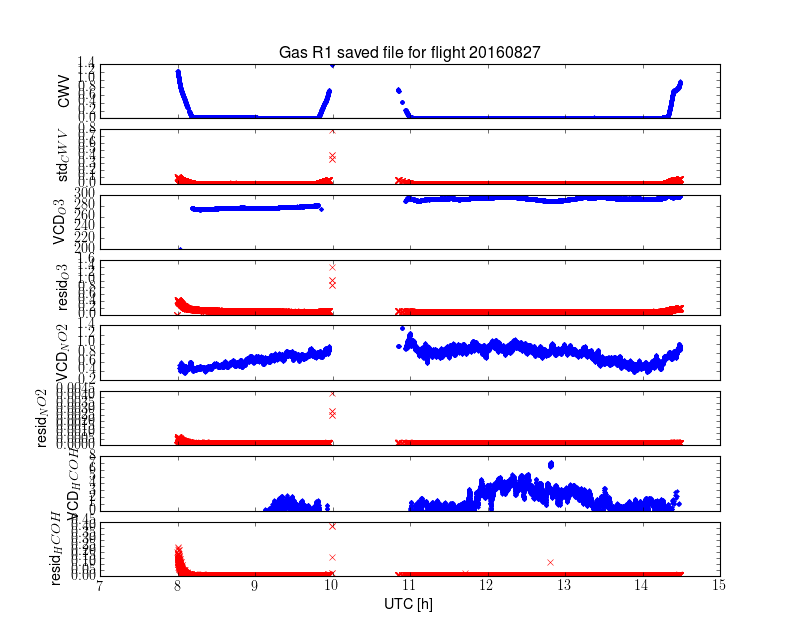

<IPython.core.display.Javascript object>


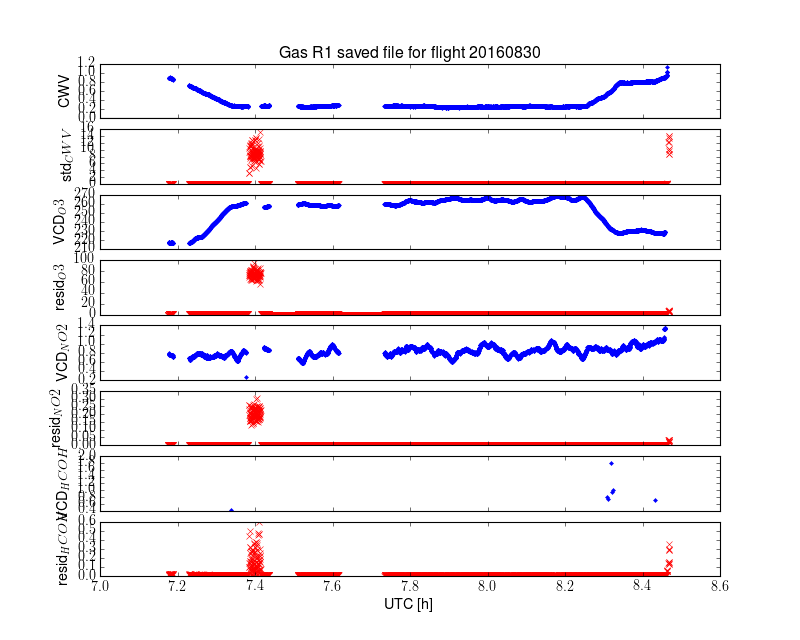

<IPython.core.display.Javascript object>


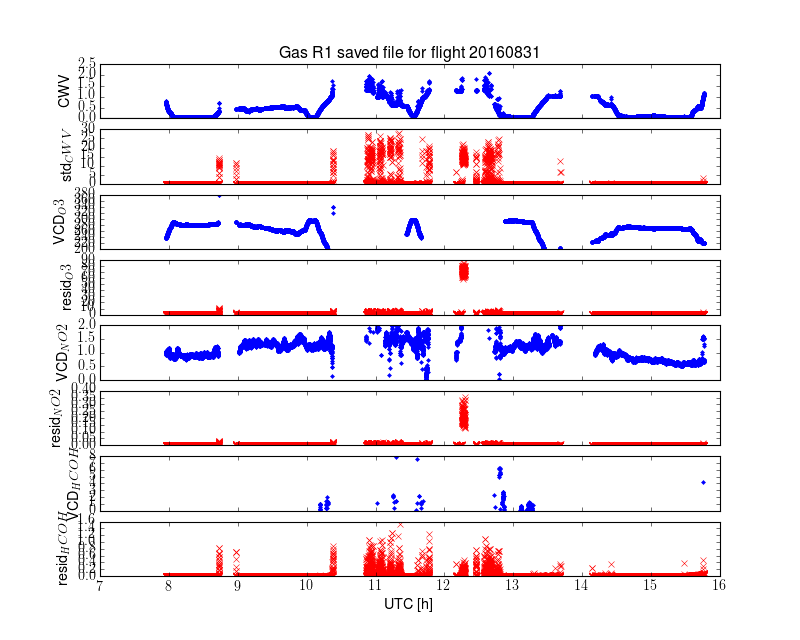

<IPython.core.display.Javascript object>


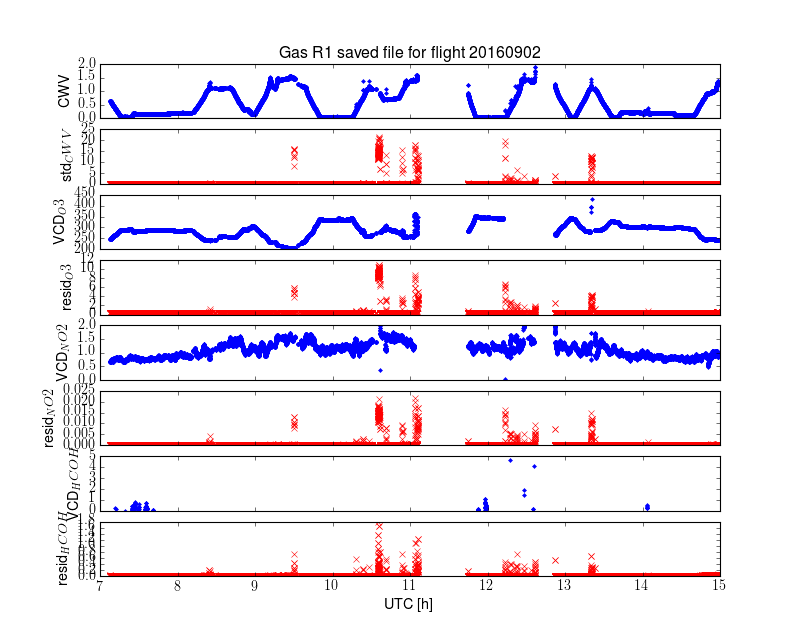

<IPython.core.display.Javascript object>


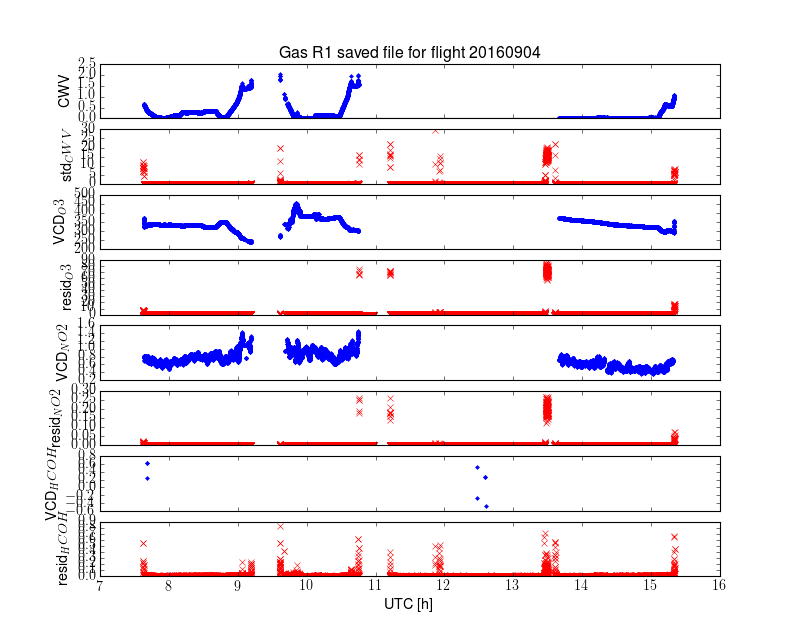

<IPython.core.display.Javascript object>


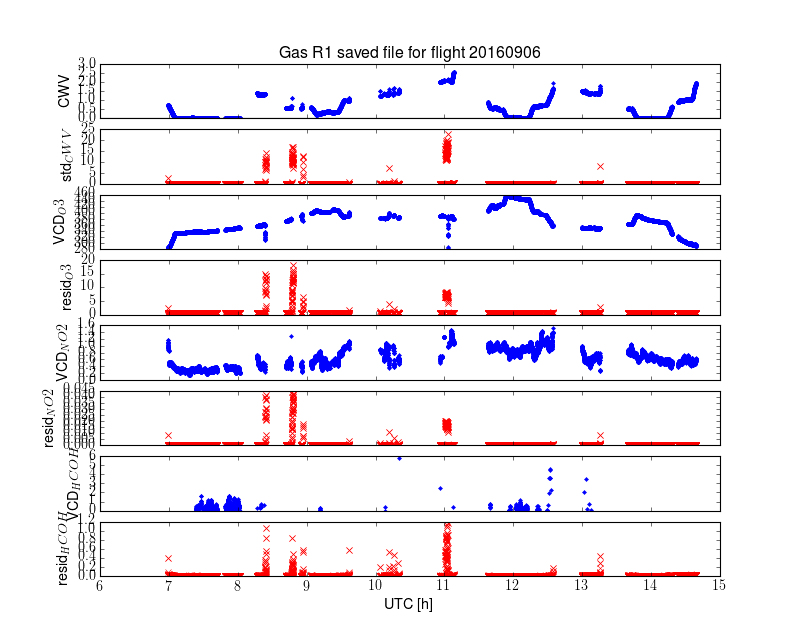

<IPython.core.display.Javascript object>


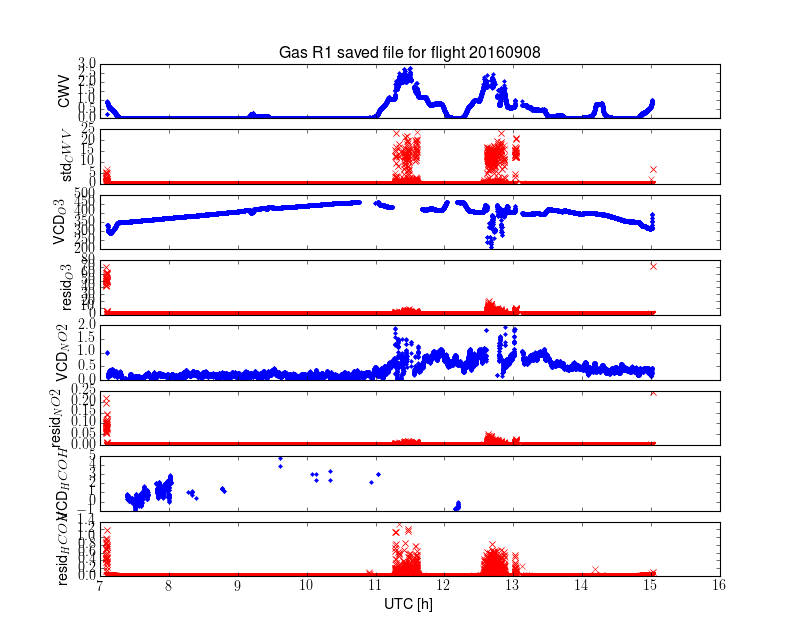

<IPython.core.display.Javascript object>


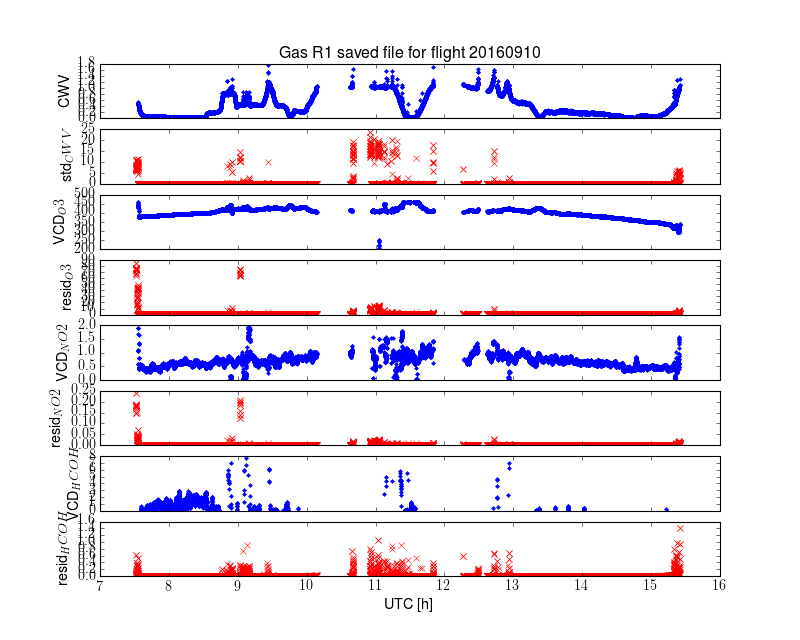

<IPython.core.display.Javascript object>


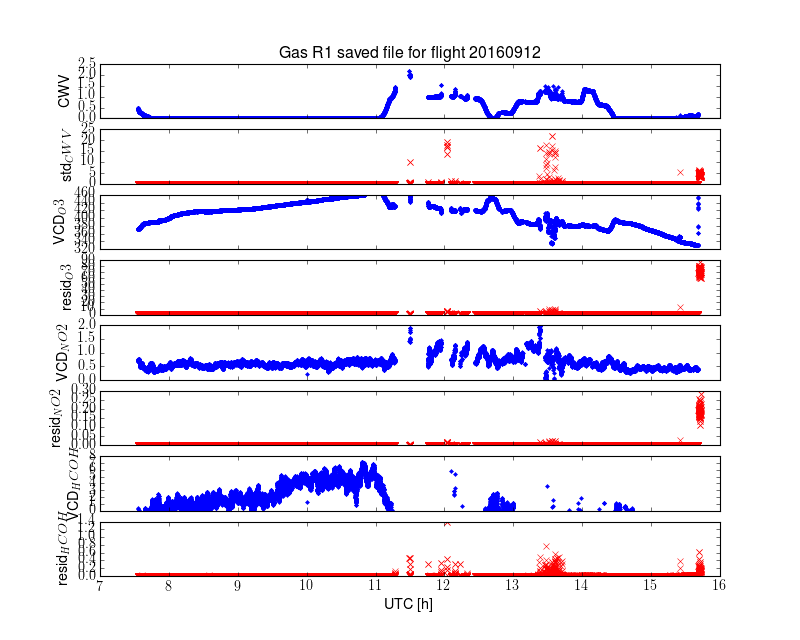

<IPython.core.display.Javascript object>


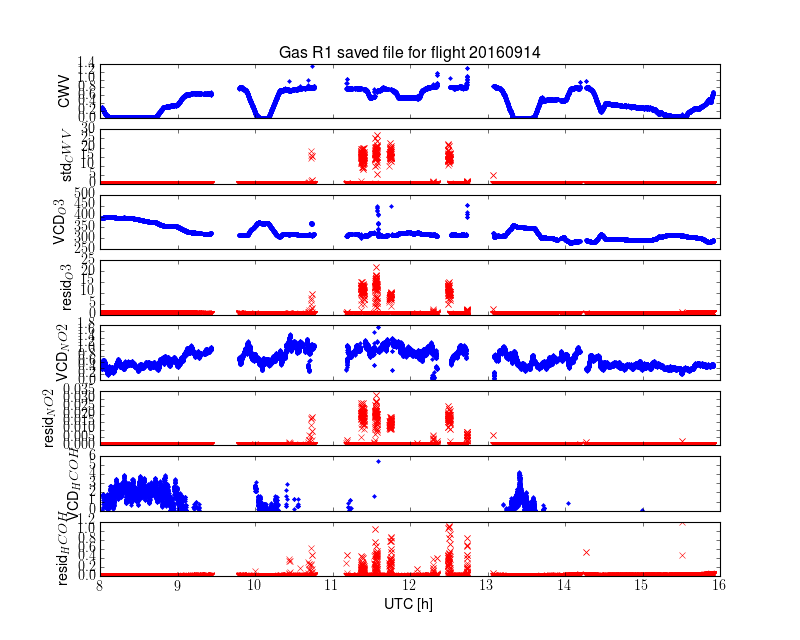

<IPython.core.display.Javascript object>


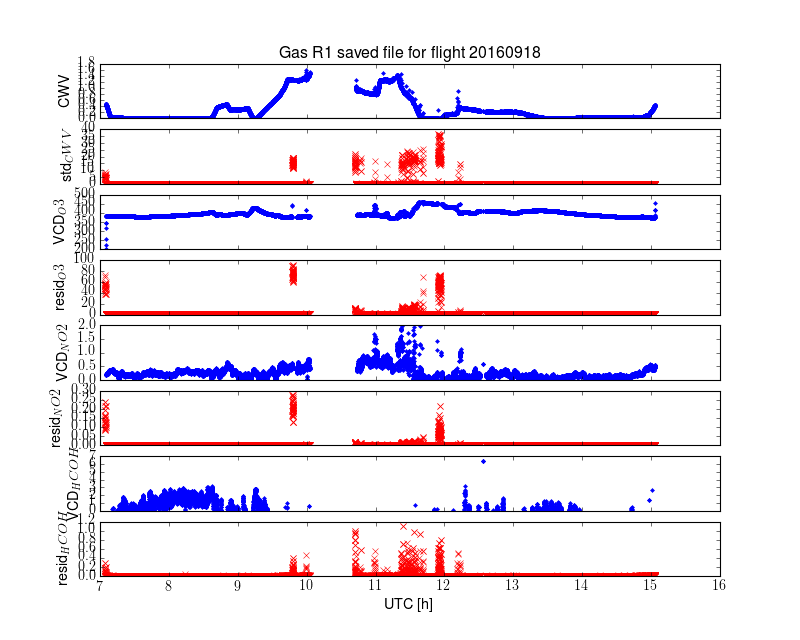

<IPython.core.display.Javascript object>


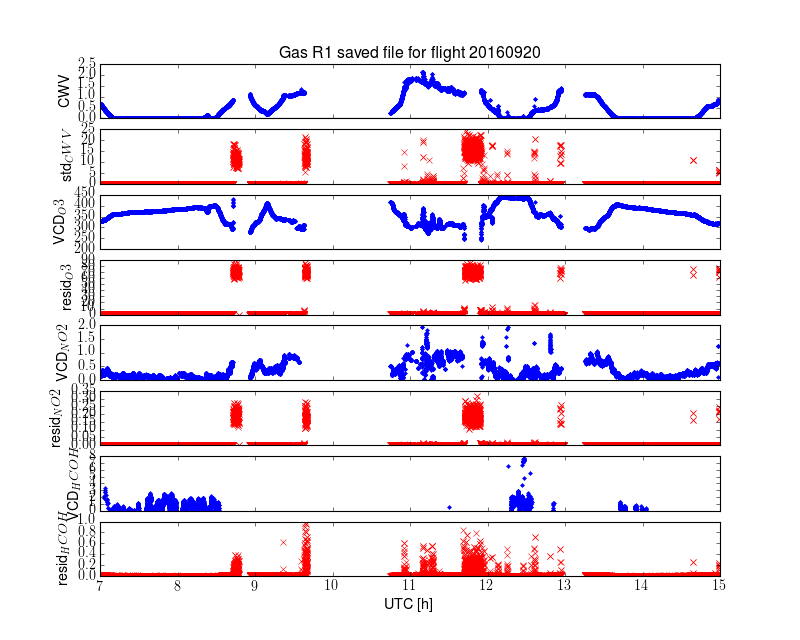

<IPython.core.display.Javascript object>


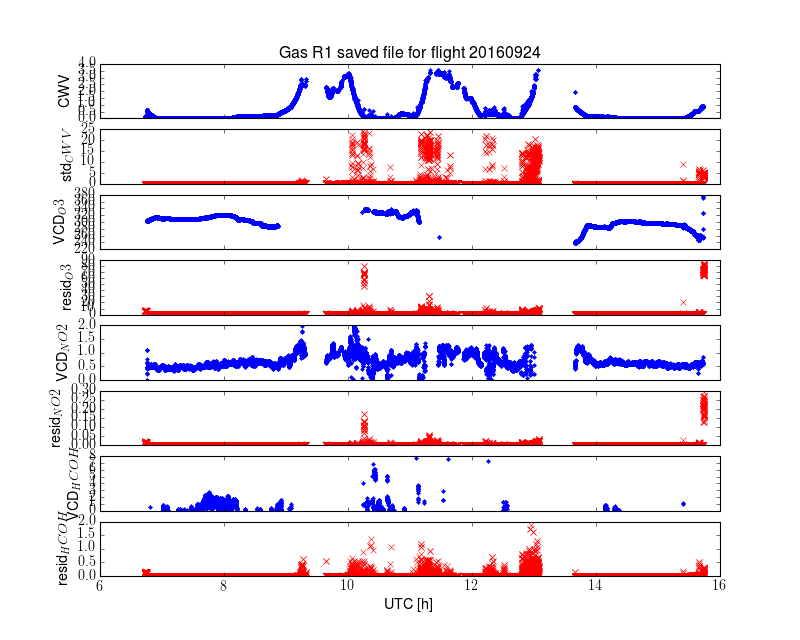

<IPython.core.display.Javascript object>


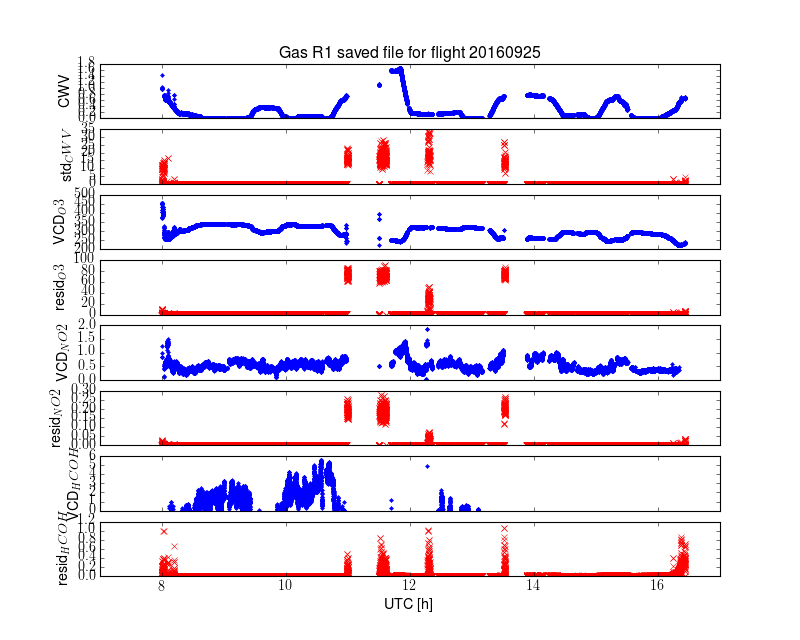

<IPython.core.display.Javascript object>


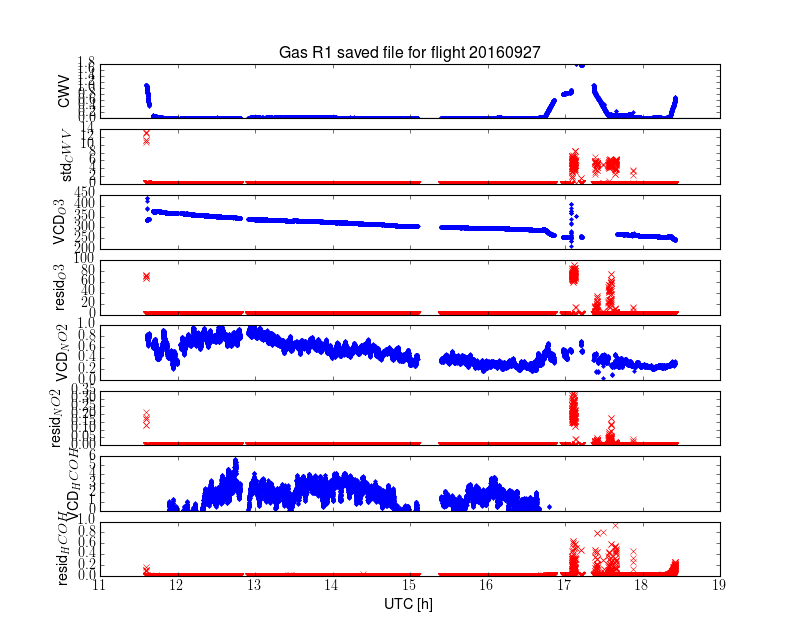

<IPython.core.display.Javascript object>


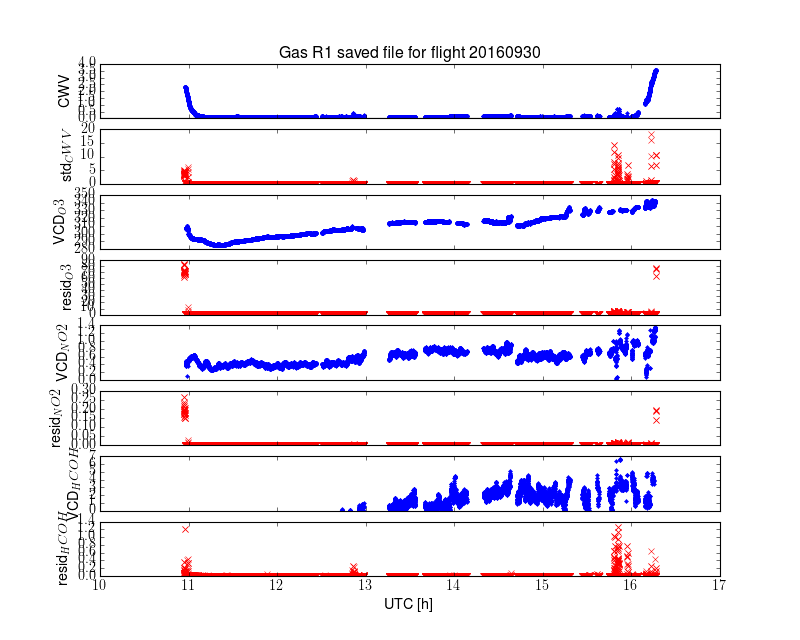

In [39]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(8,sharex=True,figsize=(10,8))
    ax = ax.ravel()
    ax[0].set_title('Gas {vv} saved file for flight {}'.format(d,vv=vv))
    
    ax[0].plot(outgas_RA[i]['Start_UTC'][outgas_RA[i]['QA_CWV']==0],outgas_RA[i]['CWV'][outgas_RA[i]['QA_CWV']==0],'.')
    ax[0].set_ylabel('CWV')
    #ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    #box = ax[0].get_position()
    #ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['std_CWV'],'xr')
    ax[1].set_ylabel('std_CWV')
    
    ax[2].plot(outgas_RA[i]['Start_UTC'][outgas_RA[i]['QA_O3']==0],outgas_RA[i]['VCD_O3'][outgas_RA[i]['QA_O3']==0],'.')
    ax[2].set_ylabel('VCD_O3')
    
    ax[3].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['resid_O3'],'xr')
    ax[3].set_ylabel('resid_O3')
    
    ax[4].plot(outgas_RA[i]['Start_UTC'][outgas_RA[i]['QA_NO2']==0],outgas_RA[i]['VCD_NO2'][outgas_RA[i]['QA_NO2']==0],'.')
    ax[4].set_ylabel('VCD_NO2')
    
    ax[5].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['resid_NO2'],'xr')
    ax[5].set_ylabel('resid_NO2')
    
    ax[6].plot(outgas_RA[i]['Start_UTC'][outgas_RA[i]['QA_HCOH']==0],outgas_RA[i]['VCD_HCOH'][outgas_RA[i]['QA_HCOH']==0],'.')
    ax[6].set_ylabel('VCD_HCOH')
    
    ax[7].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['resid_HCOH'],'xr')
    ax[7].set_ylabel('resid_HCOH')
    
    ax[7].set_xlabel('UTC [h]')